In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.fft import fft, ifft
import math


In [3]:
# Zeitveränderliche Eingangsspannung (hier eine Rechteckschwingung,
# bitte nachher modifizieren!)
def input_voltage(t):
    # Example: Square wave with 1V amplitude, 1kHz frequency
    return 1.0 if (t % 0.001) < 0.0005 else 0.0

In [4]:
# Parameter des Schaltkreises
R = 1000 # Widerstand (Ω )
L = 50e-2 # Induktivität (500 mH)
C = 0.2e-6 # Kapazität (0.1 μ F)
# Schaltkreismodell
def rlc_ode(t, state):
    v_c, i_L= state
    dvdt = i_L / C
    didt = (input_voltage(t)- R*i_L- v_c) / L
    return [dvdt, didt]
# Simulation
t_span= [0, 0.01] # 10 ms simulation
t_eval= np.linspace(*t_span, 1000)
initial_state= [0, 0] # [Initial capacitor voltage, Initial inductor current]
solution = solve_ivp(rlc_ode, t_span, initial_state, t_eval=t_eval)

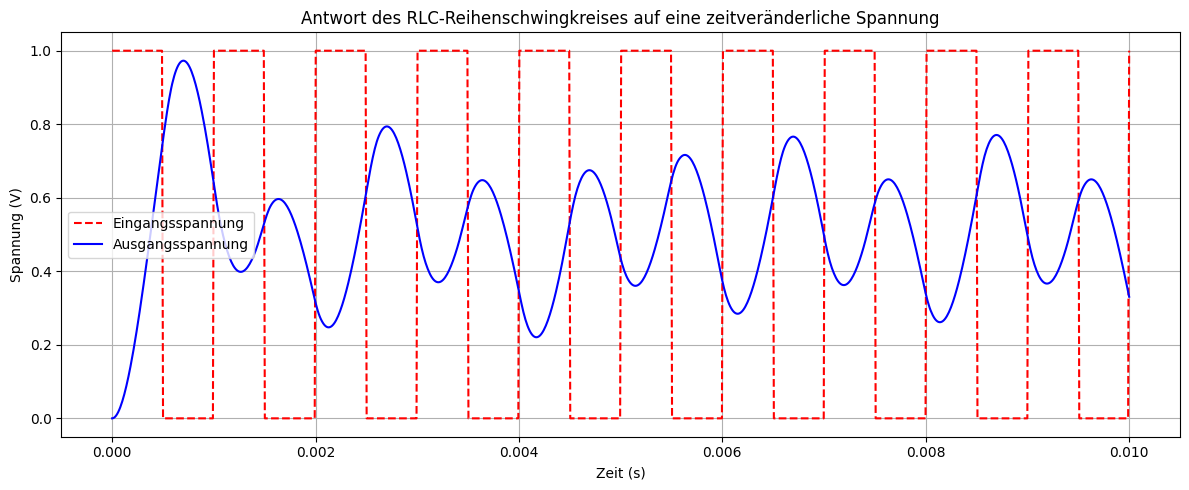

In [8]:
# Plot
plt.figure(figsize=(12, 5))
# Eingangsspannung
plt.plot(solution.t, [input_voltage(t) for t in solution.t], 'r--',
    label='Eingangsspannung')
plt.ylabel('Spannung (V)')
plt.title("Antwort des RLC-Reihenschwingkreises auf eine zeitveränderliche Spannung")
plt.xlabel('Zeit (s)')
# Ausgangsspannung
plt.plot(solution.t, solution.y[0], 'b-', label='Ausgangsspannung')
plt.legend()
plt.grid(True)
          
plt.tight_layout()